## Moondream 2

* This model seems good for object detection

* Rank #160 among open-source models in OpenCompass multimodal academic leadeboard (https://rank.opencompass.org.cn/leaderboard-multimodal)

In [1]:
# conda activate rca
'''
Moondream2
'''
from PIL import Image
import requests
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.image_utils import load_image
import sys
import os
from transformers import AutoConfig
import json
import requests
from safetensors.torch import load_file


# Add the desired directory to the Python path
sys.path.append(os.path.abspath('/data/students/earl/llava-dissector/moondream/moondream/torch'))

from hf_moondream import HfConfig, HfMoondream


from huggingface_hub import hf_hub_download
import torch
import json
from transformers import AutoModel

# Download config.json
#config_path = hf_hub_download(repo_id="vikhyatk/moondream2", filename="config.json")
config_path = "/data/students/earl/llava-dissector/moondream/moondream/torch/_config.json"
with open(config_path, "r") as f:
    config_dict = json.load(f)
#config = MoondreamConfig.from_dict(config_dict)
config = HfConfig.from_dict(config_dict)


# Initialize model
#model = HFMoondream.from_pretrained("vikhyatk/moondream2")
# Use the local copy from git clone huggingface.co/vikhyatk/moondream2
local_path = '/data/students/earl/llava-dissector/moondream/moondream/torch'
model = HfMoondream.from_pretrained(local_path)


/data/students/earl/anaconda3/envs/rca/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of HfMoondream were not initialized from the model checkpoint at /data/students/earl/llava-dissector/moondream/moondream/torch and are newly initialized: ['model.text.blocks.0.kv_cache.k_cache', 'model.text.blocks.0.kv_cache.v_cache', 'model.text.blocks.1.kv_cache.k_cache', 'model.text.blocks.1.kv_cache.v_cache', 'model.text.blocks.10.kv_cache.k_cache', 'model.text.blocks.10.kv_cache.v_cache', 'model.text.blocks.11.kv_cache.k_cache', 'model.text.blocks.11.kv_cache.v_cache', 'model.text.blocks.12.kv_cache.k_cache', 'model.text.blocks.12.kv_cache.v_cache', 'model.text.blocks.13.kv_cache.k_cache', 'model.text.blocks.13.kv_cache.v_cache', 'model.text.blocks.14.kv_cache.k_cache', 'model.text.blocks.14.kv_cache

## Visualize

Response: {'objects': [{'x_min': 0.484984515234828, 'y_min': 0.7557545956224203, 'x_max': 0.528687359765172, 'y_max': 0.8028391543775797}, {'x_min': 0.372903423383832, 'y_min': 0.6766995154321194, 'x_max': 0.418112201616168, 'y_max': 0.7627536095678806}, {'x_min': 0.37048523500561714, 'y_min': 0.7860759496688843, 'x_max': 0.42053038999438286, 'y_max': 0.8525959253311157}, {'x_min': 0.24782048538327217, 'y_min': 0.8184749968349934, 'x_max': 0.31663263961672783, 'y_max': 0.9022281281650066}]}

Found 4 shoes
Bounding Box: (0.484984515234828, 0.7557545956224203, 0.528687359765172, 0.8028391543775797)
Bounding Box: (0.372903423383832, 0.6766995154321194, 0.418112201616168, 0.7627536095678806)
Bounding Box: (0.37048523500561714, 0.7860759496688843, 0.42053038999438286, 0.8525959253311157)
Bounding Box: (0.24782048538327217, 0.8184749968349934, 0.31663263961672783, 0.9022281281650066)


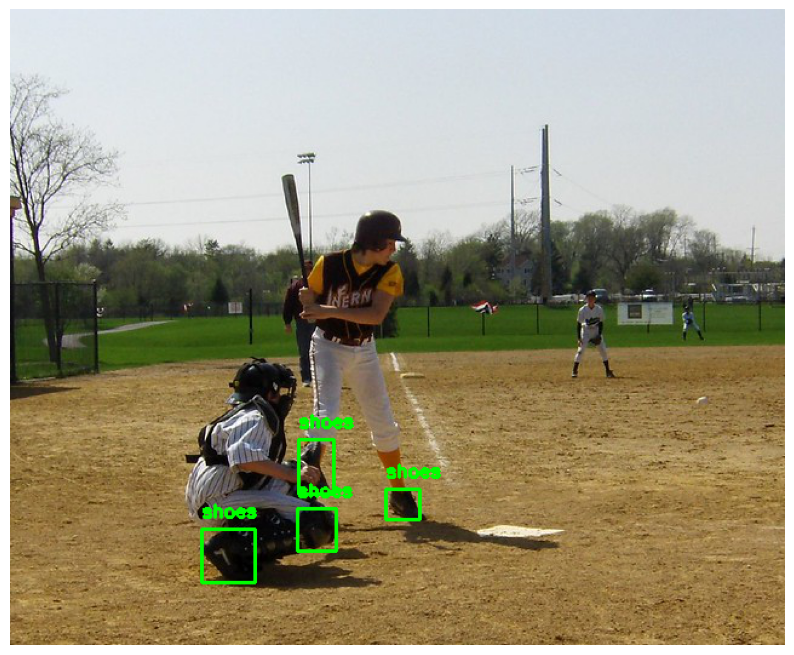

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


cls = "shoes"
model.model.threshold = None #-1.1

device = torch.device("cuda:0")  # Use GPU from CUDA_VISIBLE_DEVICES
model.to(device)


# Load and process the image
url = "https://farm3.staticflickr.com/2402/2480652763_e6b62303ee_z.jpg"
#url = "https://huggingface.co/microsoft/kosmos-2-patch14-224/resolve/main/snowman.jpg"
image = load_image(url)  # Load image from URL

objects = model.detect(image, cls)
print(f'Response: {objects}\n')
print(f"Found {len(objects['objects'])} {cls}")

# For each detected object, print the bounding box coordinates
for obj in objects['objects']:
    x_min = obj['x_min']
    y_min = obj['y_min']
    x_max = obj['x_max']
    y_max = obj['y_max']
    print(f"Bounding Box: ({x_min}, {y_min}, {x_max}, {y_max})")

# Convert the bounding boxes to pixel coordinates
for obj in objects['objects']:
    x_min = int(obj['x_min'] * image.size[0])
    y_min = int(obj['y_min'] * image.size[1])
    x_max = int(obj['x_max'] * image.size[0])
    y_max = int(obj['y_max'] * image.size[1])
    obj['bbox'] = [x_min, y_min, x_max, y_max]
    # If you want to add a label, set it here, e.g.:
    obj['label'] = cls  # or any label you want

# Using cv2 to draw bounding boxes on the image
image_cv = np.array(image) #cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
for obj in objects['objects']:
    box = obj['bbox']
    label = obj.get('label', 'object')
    cv2.rectangle(image_cv, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
    cv2.putText(image_cv, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image_cv)
plt.axis('off')
plt.show() 